In [ ]:
!pip3 install tqdm==4.29.1
!pip3 install shap
!pip3 install ipython-autotime
!pip3 install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 1.8 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.4.2 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.29.1 which is incompatible.
prophet 1.1.1 requires tqdm>=4.36.1, but you have tqdm 4.29.1 which is incompatible.
panel 0.12.1 requires tqdm>=4.48.0, but you have tqdm 4.29.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 12.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import eli5
from eli5.sklearn import PermutationImportance
from scipy import stats
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, average_precision_score
from joblib import dump, load

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

# Load Dataset

## Baseline Dataset

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/train_df.csv")
test_df = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/test_df.csv")
train_df.head()

,NPI,Tot_Benes_Mean,Tot_Srvcs_Mean,Tot_Bene_Day_Srvcs_Mean,Avg_Sbmtd_Chrg_Mean,Avg_Mdcr_Alowd_Amt_Mean,Avg_Mdcr_Pymt_Amt_Mean,Is_Fraud,Is_Male,Tot_Suplrs_Mean,...,Surgical Oncology,Thoracic Surgery,Undefined Physician type,Undersea and Hyperbaric Medicine,Urology,Vascular Surgery,Opioid_Tot_Drug_Cst_Missing,Opioid_Tot_Suply_Missing,Opioid_LA_Tot_Drug_Cst_Missing,Opioid_LA_Tot_Suply_Missing
0,1942294194,60.642857,96.642857,96.642857,216.477855,95.394587,74.656983,0.0,1.0,2.000000,...,0,0,0,0,0,0,0.0,0.0,1.0,1.0
1,1508965187,29.333333,32.833333,31.083333,463.666667,125.811621,99.238639,0.0,0.0,2.750000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,1992790315,28.000000,42.666667,42.666667,23.737179,7.180476,6.156374,0.0,1.0,9.000000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,1538164637,177.828571,259.485714,245.971429,277.273075,90.160440,68.922831,0.0,1.0,3.666667,...,0,0,0,0,1,0,0.0,0.0,0.0,0.0
4,1336368661,43.653846,82.480769,65.807692,818.563984,261.450147,207.475945,0.0,1.0,1.600000,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [ ]:
print(train_df["Is_Fraud"].value_counts())
print(test_df["Is_Fraud"].value_counts())

0.0    210665
1.0        85
Name: Is_Fraud, dtype: int64
0.0    52667
1.0       21
Name: Is_Fraud, dtype: int64


## Datasets Generated Using Resampling Methods

In [ ]:
X_train_adasyn = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/X_train_adasyn.csv")
y_train_adasyn = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/y_train_adasyn.csv")

In [ ]:
y_train_adasyn.value_counts()

Is_Fraud
0.0         210665
1.0         210644
dtype: int64

In [ ]:
X_train_smote_enn = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/X_train_smote_enn.csv")
y_train_smote_enn = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/y_train_smote_enn.csv")

In [ ]:
y_train_smote_enn.value_counts()

Is_Fraud
1.0         210665
0.0         209900
dtype: int64

In [ ]:
X_train_svm_smote = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/X_train_svm_smote_under.csv")
y_train_svm_smote = pd.read_csv("/content/drive/MyDrive/BT4012 Project/Submission Folder/Model Training Data/y_train_svm_smote_under.csv")

In [ ]:
y_train_svm_smote.value_counts()

Is_Fraud
0.0         115893
1.0         115893
dtype: int64

# Data Preprocessing

In [ ]:
X_train, y_train = train_df.drop(columns=["NPI", "Is_Fraud"]), train_df["Is_Fraud"]
X_test, y_test = test_df.drop(columns=["NPI", "Is_Fraud"]), test_df["Is_Fraud"]

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train.head()

,Tot_Benes_Mean,Tot_Srvcs_Mean,Tot_Bene_Day_Srvcs_Mean,Avg_Sbmtd_Chrg_Mean,Avg_Mdcr_Alowd_Amt_Mean,Avg_Mdcr_Pymt_Amt_Mean,Is_Male,Tot_Suplrs_Mean,Tot_Suplr_Benes_Mean,Tot_Suplr_Clms_Mean,...,Surgical Oncology,Thoracic Surgery,Undefined Physician type,Undersea and Hyperbaric Medicine,Urology,Vascular Surgery,Opioid_Tot_Drug_Cst_Missing,Opioid_Tot_Suply_Missing,Opioid_LA_Tot_Drug_Cst_Missing,Opioid_LA_Tot_Suply_Missing
0,-0.162963,-0.149922,-0.177403,-0.133186,0.046098,0.052374,0.814238,-0.578714,-0.487935,0.011593,...,-0.030197,-0.035078,-0.020205,-0.015558,-0.161204,-0.043443,-0.454475,-0.454475,1.365610,1.365610
1,-0.877559,-0.299360,-0.840665,0.480401,0.470132,0.484953,-1.228141,-0.362674,-0.487935,-0.384234,...,-0.030197,-0.035078,-0.020205,-0.015558,-0.161204,-0.043443,-0.454475,-0.454475,-0.732273,-0.732273
2,-0.907990,-0.276331,-0.723477,-0.611618,-1.183664,-1.153075,0.814238,1.437659,-0.014554,-0.087364,...,-0.030197,-0.035078,-0.020205,-0.015558,-0.161204,-0.043443,-0.454475,-0.454475,-0.732273,-0.732273
3,2.511633,0.231446,1.333345,0.017724,-0.026869,-0.048533,0.814238,-0.098625,-0.119750,0.105837,...,-0.030197,-0.035078,-0.020205,-0.015558,6.203312,-0.043443,-0.454475,-0.454475,-0.732273,-0.732273
4,-0.550713,-0.183089,-0.489360,1.361349,2.361022,2.389675,0.814238,-0.693936,-0.119750,-0.387061,...,-0.030197,-0.035078,-0.020205,-0.015558,-0.161204,-0.043443,-0.454475,-0.454475,-0.732273,-0.732273


# Logistic Regression

In [ ]:
#wj = n_samples/(n_classes*n_samplesj)
n_samples= len(train_df)
n_classes= len(train_df['Is_Fraud'].unique())
n_samples0= len(train_df[train_df['Is_Fraud']==0])
n_samples1= len(train_df[train_df['Is_Fraud']==1])

w0 = n_samples / (n_classes * n_samples0)
w1 = n_samples / (n_classes * n_samples1)

In [ ]:
# According to sklearn, saga is a good choice for large datasets
logreg = LogisticRegression(penalty='l1', solver='saga')

In [ ]:
clf_param_grid_search = {
    'penalty': ['l1', 'l2', 'elasticnet'], # default l2
    'C': [0.1, 1.0, 10], # default 1.0
    'class_weight': [{0:w0, 1:w1}, 'balanced', None] #default None,
}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
%load_ext autotime

time: 416 µs (started: 2022-11-18 05:05:41 +00:00)


In [ ]:
logreg_grid = GridSearchCV(logreg, clf_param_grid_search, cv=kfold, scoring='average_precision')
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(penalty='l1', solver='saga'),
             param_grid={'C': [0.1, 1.0, 10],
                         'class_weight': [{0: 0.5002017421023901,
                                           1: 1239.7058823529412},
                                          'balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='average_precision')

time: 1h 6min 20s (started: 2022-11-17 11:40:12 +00:00)


In [ ]:
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

{'C': 1.0, 'class_weight': {0: 0.5002017421023901, 1: 1239.7058823529412}, 'penalty': 'l2'}
0.009837157164892366
time: 7.12 ms (started: 2022-11-17 12:46:33 +00:00)


In [ ]:
dump(logreg_grid, '/content/drive/MyDrive/BT4012 Project/Submission Folder/Models/logreg_grid.joblib')

['/content/drive/MyDrive/BT4012 Project/Submission Folder/Models/logreg_grid.joblib']

time: 263 ms (started: 2022-11-17 12:46:33 +00:00)


In [ ]:
'''
{'C': 1.0, 'class_weight': {0: 0.5002017421023901, 1: 1239.7058823529412}, 'penalty': 'l2'}
0.009837157164892366
time: 7.12 ms (started: 2022-11-17 12:46:33 +00:00)
'''

In [ ]:
logreg = LogisticRegression(penalty='l2', solver='saga', C=1.0, random_state=42, class_weight={0:w0, 1:w1})
logreg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.5002017421023901, 1: 1239.7058823529412},
                   random_state=42, solver='saga')

time: 33.8 s (started: 2022-11-18 05:05:58 +00:00)


In [ ]:
y_pred = logreg.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

time: 76.4 ms (started: 2022-11-18 05:07:01 +00:00)


In [ ]:
y_pred_train = logreg.predict(X_train)

time: 27.1 ms (started: 2022-11-18 05:07:05 +00:00)


In [ ]:
%unload_ext autotime

# Evaluation Model With Weights

Text(33.0, 0.5, 'Ground Truth')

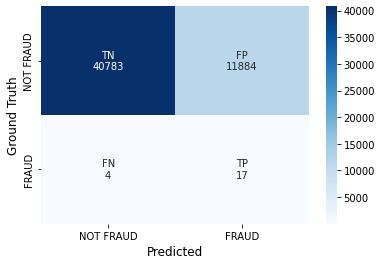

In [ ]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels_baseline = np.asarray(labels).reshape(2,2)
s = sns.heatmap(cf_matrix, annot=labels_baseline, fmt='', cmap='Blues', xticklabels=['NOT FRAUD', 'FRAUD'], yticklabels=['NOT FRAUD', 'FRAUD'])
s.set_xlabel("Predicted", fontsize=12)
s.set_ylabel("Ground Truth", fontsize=12)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87     52667
         1.0       0.00      0.81      0.00        21

    accuracy                           0.77     52688
   macro avg       0.50      0.79      0.44     52688
weighted avg       1.00      0.77      0.87     52688



In [ ]:
#Train Result
lr_proba_train = logreg.predict_proba(X_train)[:,1]
lr_precision_train, lr_recall_train, _ = precision_recall_curve(y_train, lr_proba_train)

ROC_AUC_train = round(roc_auc_score(y_train, lr_proba_train),5)
PR_AUC_train = round(auc(lr_recall_train, lr_precision_train),5)
FPR_train = round(1-recall_score(y_train, y_pred_train, pos_label=0),5) #1-specificity
recall_train = round(recall_score(y_train, y_pred_train, pos_label=1),5)
precision_train = round(precision_score(y_train, y_pred_train, pos_label=1),5)

print("TRAIN ROC_AUC: {}".format(ROC_AUC_train))
print("TRAIN PR_AUC: {}".format(PR_AUC_train))
print("TRAIN FPR: {}".format(FPR_train))
print("TRAIN Recall: {}".format(recall_train))
print("TRAIN Precision: {}".format(precision_train))

TRAIN ROC_AUC: 0.89005
TRAIN PR_AUC: 0.00663
TRAIN FPR: 0.22713
TRAIN Recall: 0.84706
TRAIN Precision: 0.0015


In [ ]:
#Test Result
lr_proba_test = logreg.predict_proba(X_test)[::,1]
lr_precision_test, lr_recall_test, _ = precision_recall_curve(y_test, lr_proba_test)

ROC_AUC_test = round(roc_auc_score(y_test, lr_proba_test),5)
PR_AUC_test = round(auc(lr_recall_test, lr_precision_test),5)
FPR_test = round(1-recall_score(y_test, y_pred, pos_label=0),5) #1-specificity
recall_test = round(recall_score(y_test, y_pred, pos_label=1),5)
precision_test = round(precision_score(y_test, y_pred, pos_label=1),5)

print("TEST ROC_AUC: {}".format(ROC_AUC_test))
print("TEST PR_AUC: {}".format(PR_AUC_test))
print("TEST FPR: {}".format(FPR_test))
print("TEST Recall: {}".format(recall_test))
print("TEST Precision: {}".format(precision_test))

TEST ROC_AUC: 0.79395
TEST PR_AUC: 0.00657
TEST FPR: 0.22564
TEST Recall: 0.80952
TEST Precision: 0.00143


# ROC AUC, PR AUC

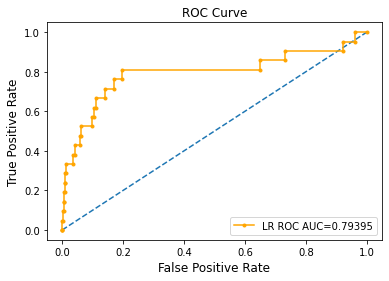

In [ ]:
lr_proba = logreg.predict_proba(X_test)[::,1]
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr_proba)
lr_roc_auc = round(roc_auc_score(y_test, lr_proba),5)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, thresholds = roc_curve(y_test, ns_probs)
ns_auc = roc_auc_score(y_test, ns_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label="LR ROC AUC="+str(lr_roc_auc), color="orange")
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

Logistic: PR AUC=0.007


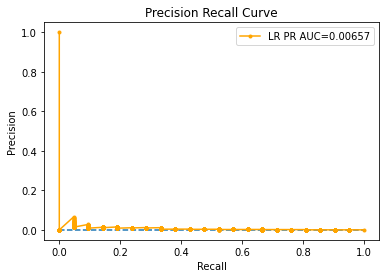

In [ ]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_proba)
lr_pr_auc = round(auc(lr_recall_test, lr_precision_test),5)
print('Logistic: PR AUC=%.3f' % (lr_pr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(lr_recall, lr_precision, marker='.', label="LR PR AUC="+str(round(lr_pr_auc,5)), color="orange")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend()
plt.show()

# Evaluation Model Without Weights

In [ ]:
logreg_no_weight = LogisticRegression(penalty='l2', solver='saga', C=1.0, random_state=42)
logreg_no_weight.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='saga')

In [ ]:
y_pred_no_weight = logreg_no_weight.predict(X_test)
cf_matrix_no_weight = confusion_matrix(y_test, y_pred_no_weight)

In [ ]:
y_pred_train_no_weight = logreg_no_weight.predict(X_train)

Text(33.0, 0.5, 'Ground Truth')

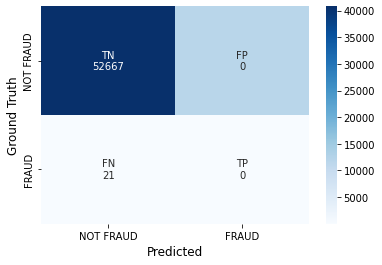

In [ ]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_no_weight.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels_baseline_no_weight = np.asarray(labels).reshape(2,2)
s = sns.heatmap(cf_matrix, annot=labels_baseline_no_weight, fmt='', cmap='Blues', xticklabels=['NOT FRAUD', 'FRAUD'], yticklabels=['NOT FRAUD', 'FRAUD'])
s.set_xlabel("Predicted", fontsize=12)
s.set_ylabel("Ground Truth", fontsize=12)

In [ ]:
print(classification_report(y_test, y_pred_no_weight))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52667
         1.0       0.00      0.00      0.00        21

    accuracy                           1.00     52688
   macro avg       0.50      0.50      0.50     52688
weighted avg       1.00      1.00      1.00     52688



In [ ]:
#Train Result
lr_proba_train_no_weight = logreg_no_weight.predict_proba(X_train)[:,1]
lr_precision_train_no_weight, lr_recall_train_no_weight, _ = precision_recall_curve(y_train, lr_proba_train_no_weight)

ROC_AUC_train_no_weight = round(roc_auc_score(y_train, lr_proba_train_no_weight),5)
PR_AUC_train_no_weight = round(auc(lr_recall_train_no_weight, lr_precision_train_no_weight),5)
FPR_train_no_weight = round(1-recall_score(y_train, y_pred_train_no_weight, pos_label=0),5)
recall_train_no_weight = round(recall_score(y_train, y_pred_train_no_weight, pos_label=1),5)
precision_train_no_weight = round(precision_score(y_train, y_pred_train_no_weight, pos_label=1),5)

print("TRAIN NO WEIGHT ROC_AUC: {}".format(ROC_AUC_train_no_weight))
print("TRAIN NO WEIGHT PR_AUC: {}".format(PR_AUC_train_no_weight))
print("TRAIN NO WEIGHT FPR: {}".format(FPR_train_no_weight))
print("TRAIN NO WEIGHT Recall: {}".format(recall_train_no_weight))
print("TRAIN NO WEIGHT Precision: {}".format(precision_train_no_weight))

TRAIN NO WEIGHT ROC_AUC: 0.80586
TRAIN NO WEIGHT PR_AUC: 0.00822
TRAIN NO WEIGHT FPR: 0.0
TRAIN NO WEIGHT Recall: 0.0
TRAIN NO WEIGHT Precision: 0.0


In [ ]:
#Test Result
lr_proba_test_no_weight = logreg_no_weight.predict_proba(X_test)[:,1]
lr_precision_test_no_weight, lr_recall_test_no_weight, _ = precision_recall_curve(y_test, lr_proba_test_no_weight)

ROC_AUC_test_no_weight = round(roc_auc_score(y_test, lr_proba_test_no_weight),5)
PR_AUC_test_no_weight = round(auc(lr_recall_test_no_weight, lr_precision_test_no_weight),5)
FPR_test_no_weight = round(1-recall_score(y_test, y_pred_no_weight, pos_label=0),5)
recall_test_no_weight = round(recall_score(y_test, y_pred_no_weight, pos_label=1),5)
precision_test_no_weight = round(precision_score(y_test, y_pred_no_weight, pos_label=1),5)

print("TEST NO WEIGHT ROC_AUC: {}".format(ROC_AUC_test_no_weight))
print("TEST NO WEIGHT PR_AUC: {}".format(PR_AUC_test_no_weight))
print("TEST NO WEIGHT FPR: {}".format(FPR_test_no_weight))
print("TEST NO WEIGHT Recall: {}".format(recall_test_no_weight))
print("TEST NO WEIGHT Precision: {}".format(precision_test_no_weight))

TEST NO WEIGHT ROC_AUC: 0.76186
TEST NO WEIGHT PR_AUC: 0.00258
TEST NO WEIGHT FPR: 0.0
TEST NO WEIGHT Recall: 0.0
TEST NO WEIGHT Precision: 0.0


# SHAP & ELI5 for Explanation

In [ ]:
explainer = shap.LinearExplainer(logreg, X_train, feature_perturbation="interventional")

In [ ]:
shap_values = explainer.shap_values(X_test)
X_test_array = X_test.to_numpy()

In [ ]:
shap.initjs()
ind = 16
print(y_test.iloc[ind])
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=X_test.columns
)

0.0


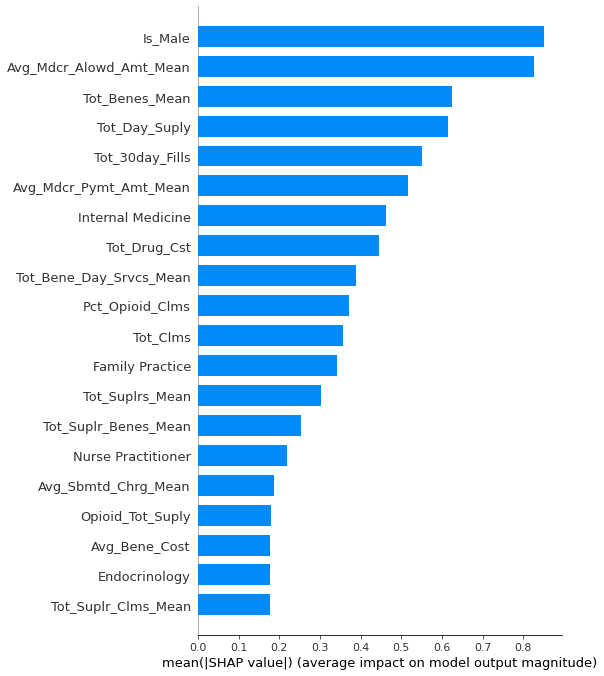

In [ ]:
shap.summary_plot(shap_values, X_test_array, feature_names=X_test.columns, sort=True, plot_type="bar")

In [ ]:
log_perm = PermutationImportance(logreg, random_state=42).fit(X_train, y_train)

print('Logistic Regression Feature Importances:')
eli5.show_weights(log_perm, feature_names=X_train.columns.to_list())

Logistic Regression Feature Importances:


Weight,Feature
0.0489 ± 0.0013,Tot_Day_Suply
0.0450 ± 0.0009,Tot_30day_Fills
0.0447 ± 0.0007,Avg_Mdcr_Alowd_Amt_Mean
0.0277 ± 0.0006,Is_Male
0.0153 ± 0.0004,Nurse Practitioner
0.0147 ± 0.0010,Tot_Benes_Mean
0.0112 ± 0.0005,Pct_Opioid_Clms
0.0111 ± 0.0008,Avg_Mdcr_Pymt_Amt_Mean
0.0088 ± 0.0004,Tot_Drug_Cst
0.0058 ± 0.0004,Pct_Opioid_LA_Clms


# Experiments

## ADASYN

In [ ]:
%load_ext autotime

time: 299 µs (started: 2022-11-18 05:44:18 +00:00)


In [ ]:
logreg_adasyn = LogisticRegression(penalty='l2', solver='saga', C=1.0, random_state=42, class_weight={0:w0, 1:w1})
logreg_adasyn.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(class_weight={0: 0.5002017421023901, 1: 1239.7058823529412},
                   random_state=42, solver='saga')

time: 1min 8s (started: 2022-11-18 05:14:29 +00:00)


In [ ]:
y_pred_adasyn = logreg_adasyn.predict(X_test)
cf_matrix_adasyn = confusion_matrix(y_test, y_pred_adasyn)

time: 65.7 ms (started: 2022-11-18 05:15:46 +00:00)


Text(33.0, 0.5, 'Ground Truth')

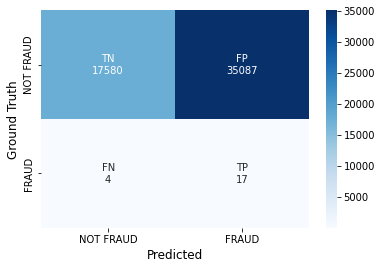

time: 158 ms (started: 2022-11-18 05:15:49 +00:00)


In [ ]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_adasyn.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels_adasyn = np.asarray(labels).reshape(2,2)
s = sns.heatmap(cf_matrix_adasyn, annot=labels_adasyn, fmt='', cmap='Blues', xticklabels=['NOT FRAUD', 'FRAUD'], yticklabels=['NOT FRAUD', 'FRAUD'])
s.set_xlabel("Predicted", fontsize=12)
s.set_ylabel("Ground Truth", fontsize=12)

In [ ]:
#Test Result
lr_proba_adasyn = logreg_adasyn.predict_proba(X_test)[:,1]
lr_precision_adasyn, lr_recall_adasyn, _ = precision_recall_curve(y_test, lr_proba_adasyn)

ROC_AUC_adasyn = round(roc_auc_score(y_test, lr_proba_adasyn),5)
PR_AUC_adasyn = round(auc(lr_recall_adasyn, lr_precision_adasyn),5)
FPR_adasyn = round(1-recall_score(y_test, y_pred_adasyn, pos_label=0),5) #1-specificity
recall_adasyn = round(recall_score(y_test, y_pred_adasyn, pos_label=1),5)
precision_adasyn = round(precision_score(y_test, y_pred_adasyn, pos_label=1),5)

print("ADASYN ROC_AUC: {}".format(ROC_AUC_adasyn))
print("ADASYN PR_AUC: {}".format(PR_AUC_adasyn))
print("ADASYN FPR: {}".format(FPR_adasyn))
print("ADASYN Recall: {}".format(recall_adasyn))
print("ADASYN Precision: {}".format(precision_adasyn))

ADASYN ROC_AUC: 0.75595
ADASYN PR_AUC: 0.00558
ADASYN FPR: 0.6662
ADASYN Recall: 0.80952
ADASYN Precision: 0.00048
time: 195 ms (started: 2022-11-18 05:16:05 +00:00)


## SMOTE ENN

In [ ]:
logreg_enn = LogisticRegression(penalty='l2', solver='saga', C=1.0, random_state=42, class_weight={0:w0, 1:w1})
logreg_enn.fit(X_train_smote_enn, y_train_smote_enn)

LogisticRegression(class_weight={0: 0.5002017421023901, 1: 1239.7058823529412},
                   random_state=42, solver='saga')

time: 1min 12s (started: 2022-11-18 05:16:23 +00:00)


In [ ]:
y_pred_enn = logreg_enn.predict(X_test)
cf_matrix_enn = confusion_matrix(y_test, y_pred_enn)

time: 162 ms (started: 2022-11-18 05:17:44 +00:00)


Text(33.0, 0.5, 'Ground Truth')

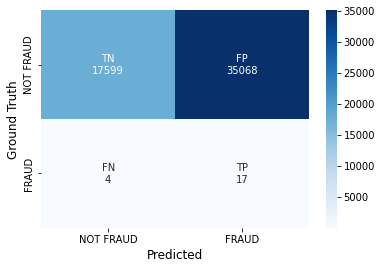

time: 167 ms (started: 2022-11-18 05:17:47 +00:00)


In [ ]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_enn.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels_enn = np.asarray(labels).reshape(2,2)
s = sns.heatmap(cf_matrix_enn, annot=labels_enn, fmt='', cmap='Blues', xticklabels=['NOT FRAUD', 'FRAUD'], yticklabels=['NOT FRAUD', 'FRAUD'])
s.set_xlabel("Predicted", fontsize=12)
s.set_ylabel("Ground Truth", fontsize=12)

In [ ]:
#Test Result
lr_proba_enn = logreg_enn.predict_proba(X_test)[:,1]
lr_precision_enn, lr_recall_enn, _ = precision_recall_curve(y_test, lr_proba_enn)

ROC_AUC_enn = round(roc_auc_score(y_test, lr_proba_enn),5)
PR_AUC_enn = round(auc(lr_recall_enn, lr_precision_enn),5)
FPR_enn = round(1-recall_score(y_test, y_pred_enn, pos_label=0),5) #1-specificity
recall_enn = round(recall_score(y_test, y_pred_enn, pos_label=1),5)
precision_enn = round(precision_score(y_test, y_pred_enn, pos_label=1),5)

print("ENN ROC_AUC: {}".format(ROC_AUC_enn))
print("ENN PR_AUC: {}".format(PR_AUC_enn))
print("ENN FPR: {}".format(FPR_enn))
print("ENN Recall: {}".format(recall_enn))
print("ENN Precision: {}".format(precision_enn))

ENN ROC_AUC: 0.75671
ENN PR_AUC: 0.00568
ENN FPR: 0.66584
ENN Recall: 0.80952
ENN Precision: 0.00048
time: 137 ms (started: 2022-11-18 05:18:03 +00:00)


## SVM SMOTE

In [ ]:
logreg_svm = LogisticRegression(penalty='l2', solver='saga', C=1.0, random_state=42, class_weight={0:w0, 1:w1})
logreg_svm.fit(X_train_svm_smote, y_train_svm_smote)

LogisticRegression(class_weight={0: 0.5002017421023901, 1: 1239.7058823529412},
                   random_state=42, solver='saga')

time: 37.5 s (started: 2022-11-18 05:44:31 +00:00)


In [ ]:
y_pred_svm = logreg_svm.predict(X_test)
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

time: 67.8 ms (started: 2022-11-18 05:45:13 +00:00)


Text(33.0, 0.5, 'Ground Truth')

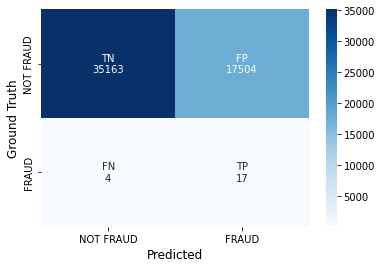

In [ ]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_svm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels_svm = np.asarray(labels).reshape(2,2)
s = sns.heatmap(cf_matrix_svm, annot=labels_svm, fmt='', cmap='Blues', xticklabels=['NOT FRAUD', 'FRAUD'], yticklabels=['NOT FRAUD', 'FRAUD'])
s.set_xlabel("Predicted", fontsize=12)
s.set_ylabel("Ground Truth", fontsize=12)

In [ ]:
#Test Result
lr_proba_svm = logreg_svm.predict_proba(X_test)[:,1]
lr_precision_svm, lr_recall_svm, _ = precision_recall_curve(y_test, lr_proba_svm)

ROC_AUC_svm = round(roc_auc_score(y_test, lr_proba_svm),5)
PR_AUC_svm = round(auc(lr_recall_svm, lr_precision_svm),5)
FPR_svm = round(1-recall_score(y_test, y_pred_svm, pos_label=0),5) #1-specificity
recall_svm = round(recall_score(y_test, y_pred_svm, pos_label=1),5)
precision_svm = round(precision_score(y_test, y_pred_svm, pos_label=1),5)

print("SVM ROC_AUC: {}".format(ROC_AUC_svm))
print("SVM PR_AUC: {}".format(PR_AUC_svm))
print("SVM FPR: {}".format(FPR_svm))
print("SVM Recall: {}".format(recall_svm))
print("SVM Precision: {}".format(precision_svm))

SVM ROC_AUC: 0.77677
SVM PR_AUC: 0.00612
SVM FPR: 0.33235
SVM Recall: 0.80952
SVM Precision: 0.00097
time: 500 ms (started: 2022-11-18 05:45:49 +00:00)


In [ ]:
%unload_ext autotime

## Results

In [ ]:
data = {'Baseline': [ROC_AUC_test, PR_AUC_test, FPR_test, recall_test, precision_test],
        'ADASYN': [ROC_AUC_adasyn, PR_AUC_adasyn, FPR_adasyn, recall_adasyn, precision_adasyn],
        'ENN': [ROC_AUC_enn, PR_AUC_enn, FPR_enn, recall_enn, precision_enn],
        'SVM': [ROC_AUC_svm, PR_AUC_svm, FPR_svm, recall_svm, precision_svm],}
result_df = pd.DataFrame(data, index=['ROC_AUC', 'PR_AUC', 'FPR', 'Recall', 'Precision'])

In [ ]:
result_df

,Baseline,ADASYN,ENN,SVM
ROC_AUC,0.79395,0.75595,0.75671,0.77677
PR_AUC,0.00657,0.00558,0.00568,0.00612
FPR,0.22564,0.66620,0.66584,0.33235
Recall,0.80952,0.80952,0.80952,0.80952
Precision,0.00143,0.00048,0.00048,0.00097


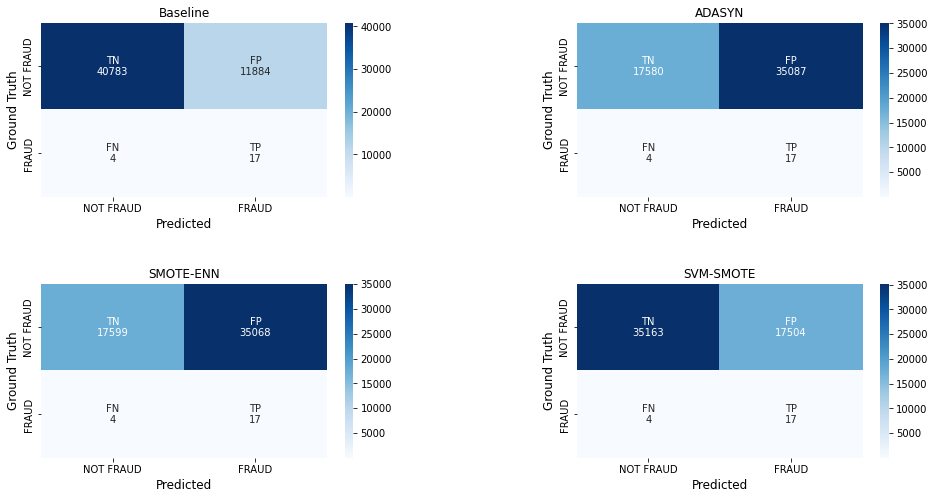

In [81]:
fig, ax =plt.subplots(ncols=2, nrows=2, figsize=(16,8))

sns.heatmap(cf_matrix, annot=labels_baseline, fmt='', cmap='Blues', xticklabels=['NOT FRAUD', 'FRAUD'], yticklabels=['NOT FRAUD', 'FRAUD'], ax=ax.flat[0])
ax.flat[0].set_title('Baseline', fontsize=12)
ax.flat[0].set_xlabel("Predicted", fontsize=12)
ax.flat[0].set_ylabel("Ground Truth", fontsize=12)

sns.heatmap(cf_matrix_adasyn, annot=labels_adasyn, fmt='', cmap='Blues', xticklabels=['NOT FRAUD', 'FRAUD'], yticklabels=['NOT FRAUD', 'FRAUD'], ax=ax.flat[1])
ax.flat[1].set_title('ADASYN', fontsize=12)
ax.flat[1].set_xlabel("Predicted", fontsize=12)
ax.flat[1].set_ylabel("Ground Truth", fontsize=12)

sns.heatmap(cf_matrix_enn, annot=labels_enn, fmt='', cmap='Blues', xticklabels=['NOT FRAUD', 'FRAUD'], yticklabels=['NOT FRAUD', 'FRAUD'], ax=ax.flat[2])
ax.flat[2].set_title('SMOTE-ENN', fontsize=12)
ax.flat[2].set_xlabel("Predicted", fontsize=12)
ax.flat[2].set_ylabel("Ground Truth", fontsize=12)

sns.heatmap(cf_matrix_svm, annot=labels_svm, fmt='', cmap='Blues', xticklabels=['NOT FRAUD', 'FRAUD'], yticklabels=['NOT FRAUD', 'FRAUD'], ax=ax.flat[3])
ax.flat[3].set_title('SVM-SMOTE', fontsize=12)
ax.flat[3].set_xlabel("Predicted", fontsize=12)
ax.flat[3].set_ylabel("Ground Truth", fontsize=12)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()